In [1]:
!pip install --upgrade tensorflow tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.5 MB/s eta 0:00:00


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.S4G9GM_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.S4G9GM_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.S4G9GM_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.
Dataset Info:
tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shap

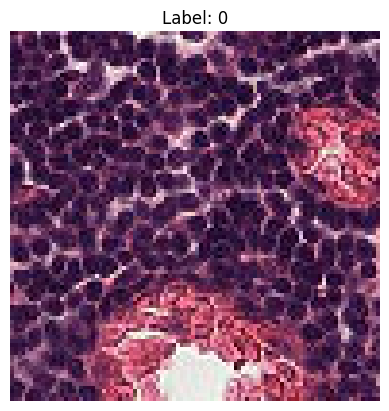

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Enable memory growth for GPUs (avoid crashes)
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PatchCamelyon dataset efficiently
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify loaded dataset
print(f"Dataset Info:\n{ds_info}")

# Example: view a sample image
import matplotlib.pyplot as plt

def show_sample(image, label):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')

for image, label in ds_train.take(1):
    show_sample(image, label)


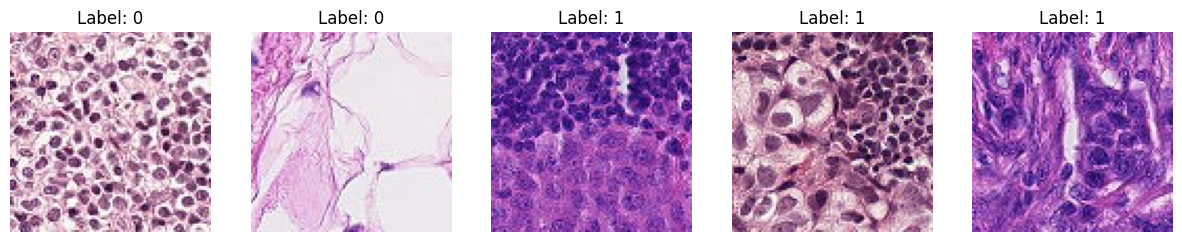

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
ds_train, ds_info = tfds.load('patch_camelyon', split='train', with_info=True, as_supervised=True)

# Display 5 sample images with labels
plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(ds_train.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.show()


tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(96, 96, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    dis

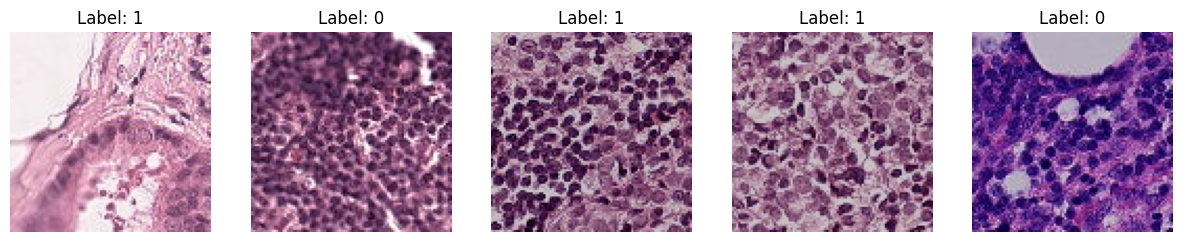

In [4]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Enable GPU memory growth to avoid runtime crashes
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PCam dataset with 80% train and 20% test split
(ds_train, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify dataset info
print(ds_info)

# Define preprocessing and augmentation functions
def preprocess(image, label):
    # Normalize images to [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize images to ensure consistent input size (if required by your models)
    image = tf.image.resize(image, [96, 96])
    return image, label

# Augmentation function according to PDM plan (rotation, flip, contrast)

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.clip_by_value(image, 0.0, 1.0)  # Ensure pixel values are within [0,1]
    return image, label

# Apply preprocessing, augmentation, batching, caching, and prefetching
batch_size = 64

# Training dataset pipeline
ds_train = (
    ds_train
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Test dataset pipeline (no augmentation, just preprocessing)
ds_test = (
    ds_test
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

# Check a batch of training images
for images, labels in ds_train.take(1):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()


In [5]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Concatenate, Multiply, Activation, Reshape
from tensorflow.keras.models import Model

def simple_attention_block(x):
    channels = x.shape[-1]
    attention = GlobalAveragePooling2D()(x)
    attention = Dense(channels//4, activation='relu')(attention)
    attention = Dense(channels, activation='sigmoid')(attention)
    attention = Reshape((1, 1, channels))(attention)
    return Multiply()([x, attention])

input_layer = Input(shape=(96, 96, 3))

# Multi-scale convolutional branches
branch1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
branch2 = Conv2D(32, (5,5), activation='relu', padding='same')(input_layer)
branch3 = Conv2D(32, (7,7), activation='relu', padding='same')(input_layer)

# Combine branches
combined = Concatenate()([branch1, branch2, branch3])

# Apply attention
attention_output = simple_attention_block(combined)

# Pooling and classification
x = GlobalAveragePooling2D()(attention_output)
output_layer = Dense(1, activation='sigmoid')(x)

# Define model
custom_mmsen_model = Model(inputs=input_layer, outputs=output_layer)

# Compile model clearly
custom_mmsen_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Model summary
custom_mmsen_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 96, 96, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 96, 96, 32)     │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 96, 96, 32)     │          4,736 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96, 96, 96)     │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 96)             │              0 │ concatenate[0][0]      │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 24)             │          2,328 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 96)             │          2,400 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 1, 96)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 96, 96, 96)     │              0 │ concatenate[0][0],     │
│                           │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 96)             │              0 │ multiply[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             97 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,889 (50.35 KB)

 Trainable params: 12,889 (50.35 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_custom_mmsen = custom_mmsen_model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1222s 372ms/step - accuracy: 0.6738 - auc: 0.7397 - loss: 0.5984 - val_accuracy: 0.7597 - val_auc: 0.8347 - val_loss: 0.5113
Epoch 2/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1129s 344ms/step - accuracy: 0.7371 - auc: 0.8090 - loss: 0.5352 - val_accuracy: 0.7657 - val_auc: 0.8435 - val_loss: 0.4958
Epoch 3/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1149s 350ms/step - accuracy: 0.7511 - auc: 0.8242 - loss: 0.5159 - val_accuracy: 0.7752 - val_auc: 0.8632 - val_loss: 0.4891
Epoch 4/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1159s 354ms/step - accuracy: 0.7619 - auc: 0.8386 - loss: 0.4974 - val_accuracy: 0.7858 - val_auc: 0.8696 - val_loss: 0.4573
Epoch 5/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1171s 357ms/step - accuracy: 0.7724 - auc: 0.8497 - loss: 0.4822 - val_accuracy: 0.7930 - val_auc: 0.8745 - val_loss: 0.4560
Epoch 6/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1175s 359ms/step - accuracy: 0.7770 - auc: 0.8539 - loss: 0.4762 - val_accuracy: 0.7976 - val_auc: 0.8814 - val_loss: 0.440

In [8]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply

def simple_attention_block(x):
    channels = x.shape[-1]  # explicitly defining 'channels' based on input tensor 'x'
    attention = GlobalAveragePooling2D()(x)
    attention = Dense(channels // 2, activation='relu')(attention)  # your modified line
    attention = Dense(channels, activation='sigmoid')(attention)
    attention = Reshape((1, 1, channels))(attention)
    return Multiply()([x, attention])


In [9]:
# Fine-tune the custom model (additional 10 epochs with lower learning rate)

# Adjust the learning rate for stable fine-tuning
custom_mmsen_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Fine-tuning training
history_finetune_custom_mmsen = custom_mmsen_model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1365s 415ms/step - accuracy: 0.8213 - auc: 0.9032 - loss: 0.3943 - val_accuracy: 0.8338 - val_auc: 0.9148 - val_loss: 0.3745
Epoch 2/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1357s 414ms/step - accuracy: 0.8233 - auc: 0.9047 - loss: 0.3911 - val_accuracy: 0.8331 - val_auc: 0.9153 - val_loss: 0.3737
Epoch 3/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1357s 414ms/step - accuracy: 0.8237 - auc: 0.9051 - loss: 0.3901 - val_accuracy: 0.8340 - val_auc: 0.9154 - val_loss: 0.3725
Epoch 4/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1355s 413ms/step - accuracy: 0.8238 - auc: 0.9052 - loss: 0.3898 - val_accuracy: 0.8340 - val_auc: 0.9156 - val_loss: 0.3723
Epoch 5/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1358s 414ms/step - accuracy: 0.8242 - auc: 0.9054 - loss: 0.3893 - val_accuracy: 0.8345 - val_auc: 0.9158 - val_loss: 0.3714
Epoch 6/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1357s 414ms/step - accuracy: 0.8244 - auc: 0.9056 - loss: 0.3889 - val_accuracy: 0.8338 - val_auc: 0.9160 - val_loss: 0.371

In [11]:
# Required imports for visualisation and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to plot training curves
def plot_training_curves(history):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.show()

In [12]:
# Function to evaluate model performance
def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        predictions = np.round(predictions).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions.flatten())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("\nCustom MM-SEN-Inspired Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

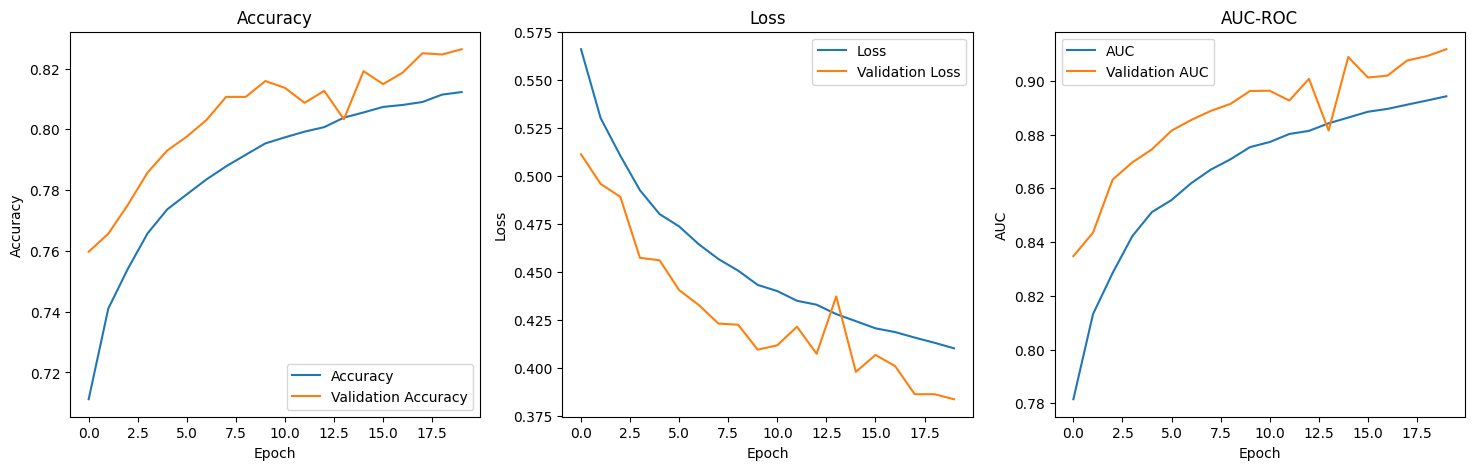

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━

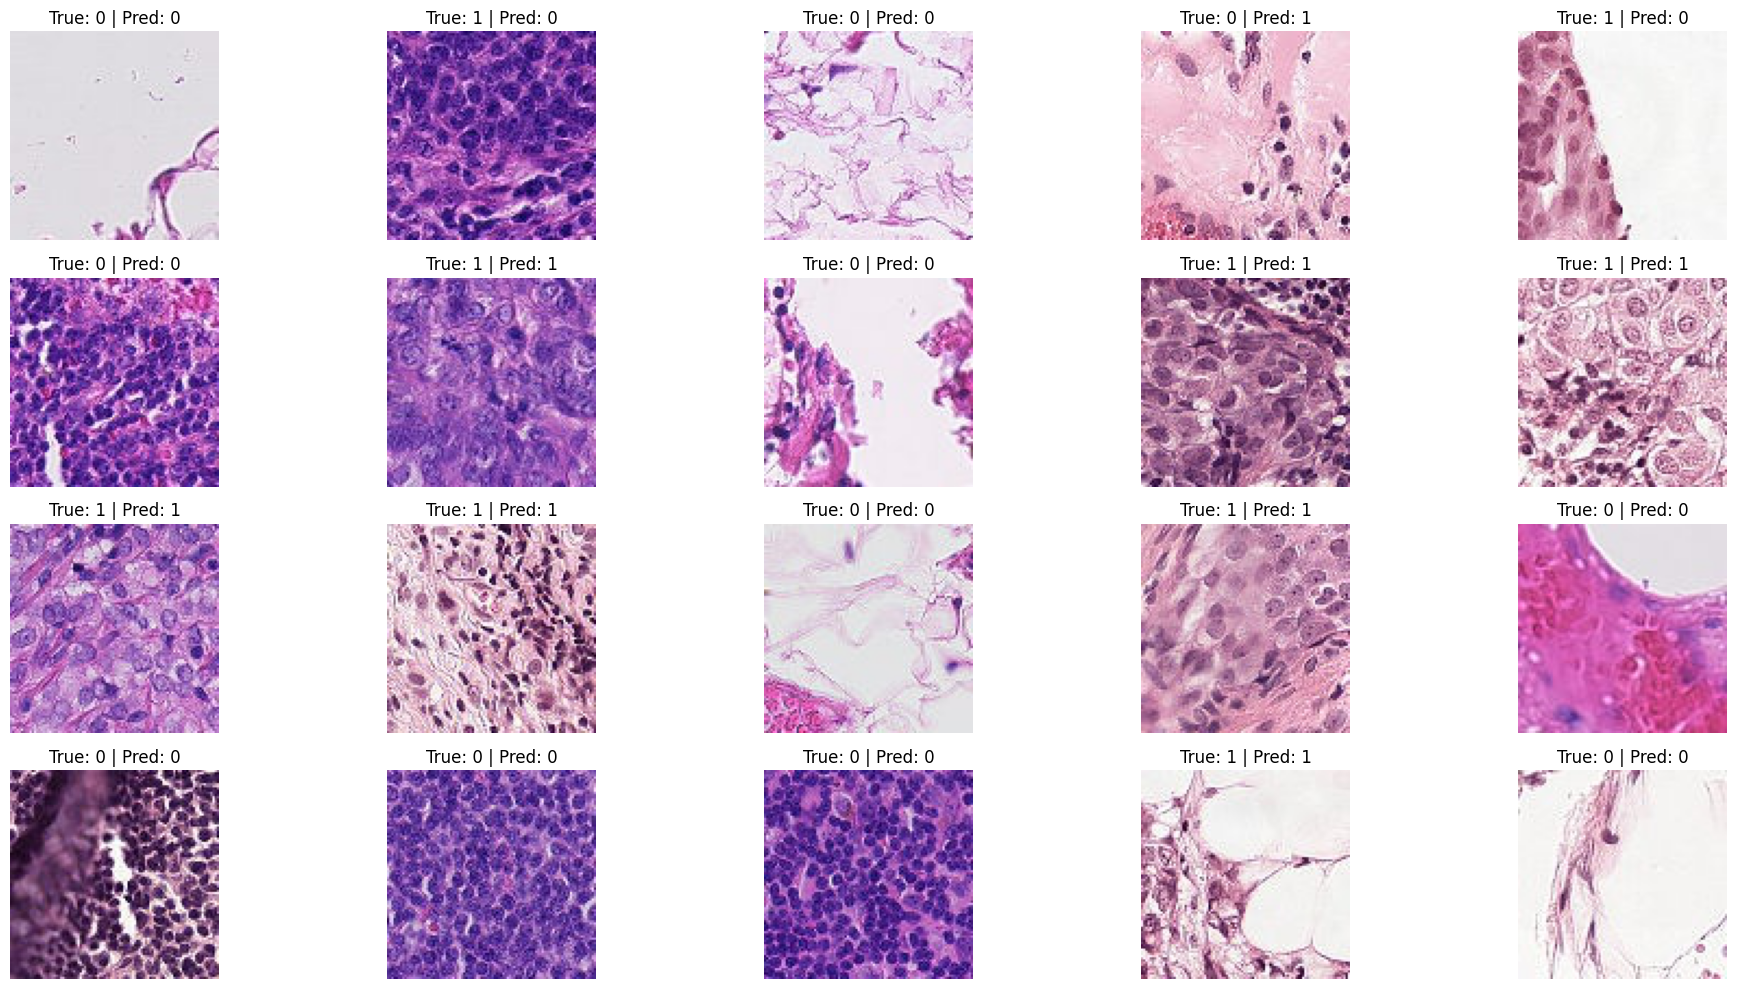

In [13]:
# Function to visualise model predictions on test images
def visualize_predictions(model, dataset, num_images=20):
    plt.figure(figsize=(20, 10))
    images_shown = 0

    for images, labels in dataset:
        predictions = model.predict(images)
        predictions_rounded = np.round(predictions).astype(int).flatten()

        for i in range(images.shape[0]):
            plt.subplot(4, 5, images_shown + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"True: {labels.numpy()[i]} | Pred: {predictions_rounded[i]}")
            plt.axis('off')
            images_shown += 1

            if images_shown >= num_images:
                plt.tight_layout()
                plt.show()
                return

# Execute clearly after training
plot_training_curves(history_custom_mmsen)
evaluate_model(custom_mmsen_model, ds_test)
visualize_predictions(custom_mmsen_model, ds_test, num_images=20)

In [ ]:
# Required imports for visualization and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to plot training curves
def plot_training_curves(history):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.show()

# Function to evaluate model performance
def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        predictions = np.round(predictions).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions.flatten())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("\nCustom MM-SEN-Inspired Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

# Function to visualize model predictions on test images
def visualize_predictions(model, dataset, num_images=20):
    plt.figure(figsize=(20, 10))
    images_shown = 0

    for images, labels in dataset:
        predictions = model.predict(images)
        predictions_rounded = np.round(predictions).astype(int).flatten()

        for i in range(images.shape[0]):
            plt.subplot(4, 5, images_shown + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"True: {labels.numpy()[i]} | Pred: {predictions_rounded[i]}")
            plt.axis('off')
            images_shown += 1

            if images_shown >= num_images:
                plt.tight_layout()
                plt.show()
                return

# Further fine-tuning the custom model (additional 10 epochs with even lower learning rate)
custom_mmsen_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Execute further fine-tuning
history_finetune_extended = custom_mmsen_model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

# Evaluate and visualize clearly after additional fine-tuning
plot_training_curves(history_finetune_extended)
evaluate_model(custom_mmsen_model, ds_test)
visualize_predictions(custom_mmsen_model, ds_test, num_images=20)


Epoch 1/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1362s 415ms/step - accuracy: 0.8262 - auc: 0.9073 - loss: 0.3856 - val_accuracy: 0.8368 - val_auc: 0.9175 - val_loss: 0.3680
Epoch 2/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1359s 415ms/step - accuracy: 0.8265 - auc: 0.9072 - loss: 0.3857 - val_accuracy: 0.8367 - val_auc: 0.9177 - val_loss: 0.3679
Epoch 3/10
1918/3277 ━━━━━━━━━━━━━━━━━━━━ 8:45 387ms/step - accuracy: 0.8265 - auc: 0.9074 - loss: 0.3855

In [ ]:
# Required imports for visualisation and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to plot training curves
def plot_training_curves(history):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.show()

# Function to visualise model predictions on test images
def visualize_predictions(model, dataset, num_images=20):
    plt.figure(figsize=(20, 10))
    images_shown = 0

    for images, labels in dataset:
        predictions = model.predict(images)
        predictions_rounded = np.round(predictions).astype(int).flatten()

        for i in range(images.shape[0]):
            plt.subplot(4, 5, images_shown + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"True: {labels.numpy()[i]} | Pred: {predictions_rounded[i]}")
            plt.axis('off')
            images_shown += 1

            if images_shown >= num_images:
                plt.tight_layout()
                plt.show()
                return

In [ ]:

# Function to evaluate model performance
def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        predictions = np.round(predictions).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions.flatten())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("\nCustom MM-SEN-Inspired Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")